In [115]:
import pprint
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

## Bid-Frame

In [141]:
# Utility
def cumu_sum(units):
    total = 0
    for u in units:
        total += u
        yield total

class OrderBook():
    col_names = [
        'Unit',
        'Price',
        'Type',
        'User'
    ]

    def __init__(self):
        self.num_bids = 0
        self.num_asks = 0
        self.bids = []
        self.asks = []

    def add_bid(
        self,
        unit,
        price,
        user_id
    ):
        new_bid = (unit, price, 'bid', user_id)
        self.bids.append(new_bid)
        self.num_bids += 1

    def add_ask(
        self,
        unit,
        price,
        user_id
    ):
        new_ask = (unit, price, 'ask', user_id)
        self.asks.append(new_ask)
        self.num_asks += 1

    def display(self, scale = 0):
        if scale == 0:
            full_data = self.bids + self.asks
            df = pd.DataFrame(full_data, columns=self.col_names)
        elif scale == 1:
            df = pd.DataFrame(self.bids, columns=self.col_names)
        else:
            df = pd.DataFrame(self.asks, columns=self.col_names)

        return df

    def get_demand_curve(self):
        # {price : units}
        bid_dict = Counter()
        
        for bid in self.bids:
            bid_dict[bid[1]] += bid[0]
        sorted_bids = sorted(list(bid_dict.items()), reverse=True)
        
        return sorted_bids

    def get_supply_curve(self):
        # {price : units}
        ask_dict = Counter()
        
        for ask in self.asks:
            ask_dict[ask[1]] += ask[0]
        sorted_asks = sorted(list(ask_dict.items()))
        
        return sorted_asks

    def plot_curves(self):
        demand_curve = self.get_demand_curve()
        supply_curve = self.get_supply_curve()

        demand_units = [unit for price, unit in demand_curve]
        demand_prices = [price for price, unit in demand_curve]
        cumulative_demand = [0] + list(cumu_sum(demand_units))
    
        supply_units = [unit for price, unit in supply_curve]
        supply_prices = [price for price, unit in supply_curve]
        cumulative_supply = [0] + list(cumu_sum(supply_units))
    
        demand_prices = demand_prices + [demand_prices[-1]]
        supply_prices = supply_prices + [supply_prices[-1]]
    
        plt.step(cumulative_demand, demand_prices, label='Demand Curve', where='post', 
                 color='#1f77b4', linewidth=2.5, alpha=0.8)
        plt.step(cumulative_supply, supply_prices, label='Supply Curve', where='post', 
                 color='#ff7f0e', linewidth=2.5, alpha=0.8)
    
        plt.title('Cumulative Demand and Supply Curves', fontsize=14, fontweight='bold')
        plt.xlabel('Cumulative Units', fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.legend(loc='best', frameon=True, fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6)
    
        # Show the plot
        plt.show()

In [142]:
M = OrderBook()

In [143]:
M.add_ask(10, 1, 0)
M.add_ask(1, 1, 0)
M.add_ask(3, 2, 0)

M.add_bid(10, 1, 0)
M.add_bid(1, 1, 0)
M.add_bid(3, 2, 0)

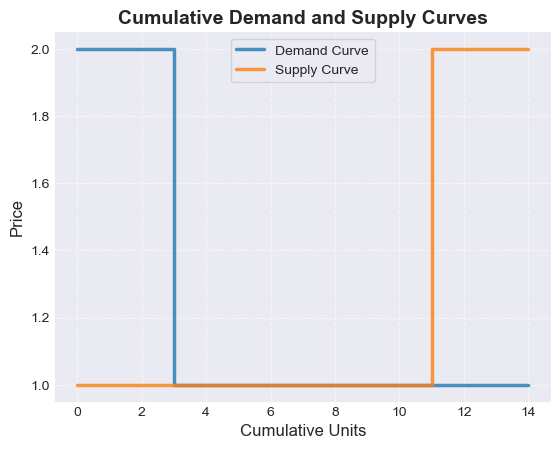

In [146]:
M.plot_curves()